In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn xgboost

/tmp/ipython-input-2-3515142705.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y')
[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2022-07-26  21239.753906  21361.121094  20776.816406  21361.121094   
2022-07-27  22930.548828  22986.529297  21070.806641  21244.169922   
2022-07-28  23843.886719  24110.470703  22722.265625  22933.640625   
2022-07-29  23804.632812  24294.787109  23481.173828  23845.212891   
2022-07-30  23656.207031  24572.580078  23580.507812  23796.818359   

Price            Volume  
Ticker          BTC-USD  
Date                     
2022-07-26  28624673855  
2022-07-27  31758955233  
2022-07-28  40212386158  
2022-07-29  35887249746  
2022-07-30  28148218301  


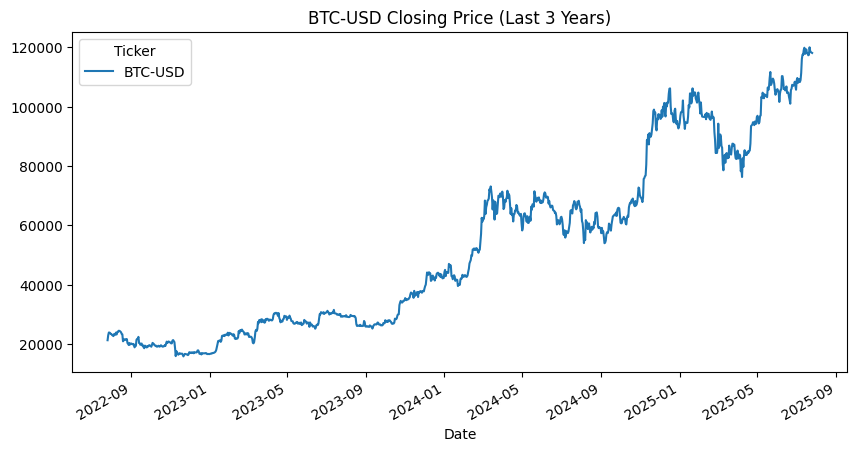

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Bitcoin data (3 years)
ticker = 'BTC-USD'
data = yf.download(ticker, period='3y')

# Show first 5 rows
print(data.head())

# Plot the closing price to visualize
data['Close'].plot(title='BTC-USD Closing Price (Last 3 Years)', figsize=(10, 5))
plt.show()

In [3]:
import pandas as pd
import numpy as np

df = data.copy()

df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2022-07-26,21239.753906,21361.121094,20776.816406,21361.121094,28624673855
2022-07-27,22930.548828,22986.529297,21070.806641,21244.169922,31758955233
2022-07-28,23843.886719,24110.470703,22722.265625,22933.640625,40212386158
2022-07-29,23804.632812,24294.787109,23481.173828,23845.212891,35887249746
2022-07-30,23656.207031,24572.580078,23580.507812,23796.818359,28148218301


In [4]:
# 1. Daily returns
df['Return'] = df['Close'].pct_change()

# 2. Moving Averages (5, 10, 20 days)
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# 3. Relative Strength Index (RSI)
window_length = 14
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [5]:
# 4. Volatility (10-day rolling std of returns)
df['Volatility'] = df['Return'].rolling(window=10).std()

# 5. Target variable (1 if tomorrow's close > today's, else 0)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [6]:
# Drop rows with NaN values (from rolling calculations)
df = df.dropna()

df.head(10)

Price,Close,High,Low,Open,Volume,Return,MA5,MA10,MA20,RSI,Volatility,Target
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,
Date,,,,,,,,,,,,
2022-08-14,24319.333984,24974.914062,24206.259766,24429.056641,22994133555,-0.004288,24210.278516,23745.168164,23401.669434,60.795562,0.019929,0
2022-08-15,24136.972656,25135.589844,23839.775391,24318.316406,35123501685,-0.007499,24248.144531,23829.933984,23546.530371,58.734593,0.018833,0
2022-08-16,23883.291016,24228.416016,23733.500000,24126.136719,27753685646,-0.010510,24233.296875,23922.135156,23594.167480,59.780471,0.018487,0
2022-08-17,23335.998047,24407.058594,23243.353516,23881.316406,30931623076,-0.022915,24019.932812,23938.145898,23568.773047,54.853032,0.020205,0
2022-08-18,23212.738281,23563.832031,23177.601562,23341.039062,23747613147,-0.005282,23777.666797,23878.471094,23539.178320,55.875572,0.017966,0
2022-08-19,20877.552734,23213.312500,20868.847656,23213.312500,40509610260,-0.100599,23089.310547,23649.794531,23400.245605,31.805373,0.035589,1
2022-08-20,21166.060547,21350.806641,20856.730469,20872.841797,27595671000,0.013819,22495.128125,23371.636328,23291.703809,36.375392,0.033362,1
2022-08-21,21534.121094,21668.845703,21103.197266,21160.392578,23102307723,0.017389,22025.294141,23129.295508,23202.699902,37.823587,0.034463,0


In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Features we’ll use (drop Target and non-features)
features = ['Return', 'MA5', 'MA10', 'MA20', 'RSI', 'Volatility']

X = df[features]
y = df['Target']

# Train/test split (time-based, no shuffle)
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [8]:
# Initialize XGBoost classifier
model = XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.05,     # step size
    max_depth=4,            # tree depth
    subsample=0.8,          # for regularization
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [9]:
# Train model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.43      0.45       106
           1       0.48      0.51      0.50       110

    accuracy                           0.47       216
   macro avg       0.47      0.47      0.47       216
weighted avg       0.47      0.47      0.47       216



## feedback 1

we see that it is not good, so we will upgrade our project:

- Instead of predicting tomorrow’s move (1 day) (which is random and noisy),
we’ll predict if the price is higher 3 days from now (a 3-day horizon).
This smooths the trend a bit.

- Besides MA and RSI, we’ll add:

=> Bollinger Bands (upper and lower bands for volatility)

=> MACD & Signal Line (momentum trend indicator)

=> Lagged Returns (returns from last 3 days as features)

- Use GridSearchCV to optimize n_estimators, max_depth, and learning_rate.

In [13]:
import pandas as pd
import numpy as np

df = data.copy()

# --- Target: price 3 days ahead ---
df['Target'] = (df['Close'].shift(-3) > df['Close']).astype(int)

# --- Returns & Moving Averages ---
df['Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# --- Bollinger Bands (20-day) ---
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Bollinger_Upper'] = rolling_mean + (2 * rolling_std)
df['Bollinger_Lower'] = rolling_mean - (2 * rolling_std)

# --- MACD (12,26) and Signal (9) ---
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


# --- Lagged Returns (last 3 days) ---
df['Lag1'] = df['Return'].shift(1)
df['Lag2'] = df['Return'].shift(2)
df['Lag3'] = df['Return'].shift(3)

In [14]:
df = df.dropna()

print("\nClass balance:\n", df['Target'].value_counts())

df.head(10)


Class balance:
 Target
1    582
0    495
Name: count, dtype: int64


Price,Close,High,Low,Open,Volume,Target,Return,MA5,MA10,MA20,Bollinger_Upper,Bollinger_Lower,MACD,Signal,Lag1,Lag2,Lag3
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2022-08-14,24319.333984,24974.914062,24206.259766,24429.056641,22994133555,0,-0.004288,24210.278516,23745.168164,23401.669434,24880.571633,21922.767234,631.522444,553.590416,0.000871,0.018587,0.000413
2022-08-15,24136.972656,25135.589844,23839.775391,24318.316406,35123501685,0,-0.007499,24248.144531,23829.933984,23546.530371,24654.973462,22438.087281,617.520309,566.376395,-0.004288,0.000871,0.018587
2022-08-16,23883.291016,24228.416016,23733.500000,24126.136719,27753685646,0,-0.010510,24233.296875,23922.135156,23594.167480,24672.632031,22515.702930,579.275995,568.956315,-0.007499,-0.004288,0.000871
2022-08-17,23335.998047,24407.058594,23243.353516,23881.316406,30931623076,0,-0.022915,24019.932812,23938.145898,23568.773047,24646.397305,22491.148788,499.052367,554.975525,-0.010510,-0.007499,-0.004288
2022-08-18,23212.738281,23563.832031,23177.601562,23341.039062,23747613147,0,-0.005282,23777.666797,23878.471094,23539.178320,24622.026968,22456.329673,420.679203,528.116261,-0.022915,-0.010510,-0.007499
2022-08-19,20877.552734,23213.312500,20868.847656,23213.312500,40509610260,1,-0.100599,23089.310547,23649.794531,23400.245605,25006.429362,21794.061849,168.199054,456.132819,-0.005282,-0.022915,-0.010510
2022-08-20,21166.060547,21350.806641,20856.730469,20872.841797,27595671000,1,0.013819,22495.128125,23371.636328,23291.703809,25183.854802,21399.552815,-8.514959,363.203264,-0.100599,-0.005282,-0.022915
2022-08-21,21534.121094,21668.845703,21103.197266,21160.392578,23102307723,0,0.017389,22025.294141,23129.295508,23202.699902,25251.384980,21154.014824,-117.508117,267.060988,0.013819,-0.100599,-0.005282


### Hyperparameter Tuning with Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Features to use (add the new ones)
features = [
    'Return', 'MA5', 'MA10', 'MA20',
    'Bollinger_Upper', 'Bollinger_Lower',
    'MACD', 'Signal',
    'Lag1', 'Lag2', 'Lag3'
]

X = df[features]
y = df['Target']

# TimeSeriesSplit to respect time order
tscv = TimeSeriesSplit(n_splits=5)

In [17]:
# XGBoost classifier (base model)
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid Search with TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Run the grid search
grid_search.fit(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamm...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [18]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation accuracy: 0.5195530726256983


In [19]:
# Evaluate best model on last 20% (holdout test set)
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:25:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Accuracy: 0.5648148148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56        97
           1       0.63      0.52      0.57       119

    accuracy                           0.56       216
   macro avg       0.57      0.57      0.56       216
weighted avg       0.58      0.56      0.57       216



### Feature Importance

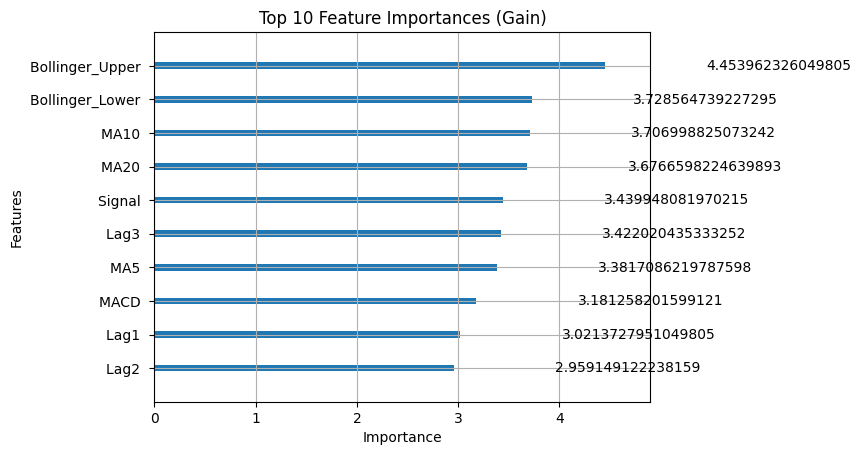

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Use the best model from grid search
model = grid_search.best_estimator_

# Plot feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='gain',
                    title='Top 10 Feature Importances (Gain)', xlabel='Importance')
plt.show()


### Why is \~56% accuracy on BTC price direction common?

1. **Financial markets (especially crypto) are noisy & partially random:**
   Price moves daily are influenced by tons of unpredictable factors (news, sentiment, whales, regulation, etc).
   Even the best models rarely go far beyond \~55-60% accuracy on daily direction.

2. **Limits of technical indicators:**
   Traditional indicators (MA, RSI, MACD) are based on price history — so they capture some patterns but not all info.

3. **Data frequency & horizon:**
   Predicting **next day or short-term** moves is harder than longer horizons. Weekly or monthly prediction may be easier.